In [1]:
#optimizing the parameters of LCDM model(flat) by minimizing the chi-squared value

import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import minimize

#data of H_obs,z_obs,sigma_obs 

H_obs = np.array([69,69,68.6,83,75,75,72.9,77,88.8,83,83,95,77,87.1,92.8,89,80.9,97,104,92,105,125,90,117,154,168,160,177,140,202,186.5])
z_obs = np.array([0.07,0.09,0.12,0.17,0.179,0.199,0.2,0.27,0.28,0.352,0.3802,0.4,0.4004,0.4247,0.4497,0.47,0.4783,0.48,0.593,0.68,0.781,0.875,0.88,0.9,1.037,1.3,1.363,1.43,1.53,1.75,1.965])
sigma_obs = np.array([19.6,12,26.2,8,4,5,29.6,14,36.6,14,13.5,17,10.2,11.2,12.9,50,9,62,13,8,12,17,40,23,20,17,33.6,18,14,40,50.4])

In [2]:
def H_model( z,parameters):
    omega_mo,Ho = parameters
    H_model= Ho*np.sqrt(omega_mo*(1+z)**3 + (1-omega_mo))
     #print("H_model1:", H_model)
    return H_model

In [3]:
def chi_sq( parameters,H_obs,z_obs,sigma_obs):
    n = z_obs.shape[0]
    H_theo = np.zeros(n)
    omega_mo,Ho = parameters
    chi_sq = 0
    for i in range(n):
        H_theo[i]= H_model( z_obs[i],parameters)
        #print("H_obs, H_theo:", H_obs[i], H_theo[i])
        chi_sq = chi_sq + (H_obs[i] - H_theo[i])**2/(sigma_obs[i])**2
    return chi_sq

In [4]:
initial = np.array([0.3,70])
soln = minimize( chi_sq ,initial,args=( H_obs,z_obs,sigma_obs),bounds=[(0,1),(0,np.inf)])
print("Optimal Parameters:", soln.x)
print("Convergence:", soln.success)


Optimal Parameters: [ 0.31955535 68.1499187 ]
Convergence: True


In [5]:
initial = np.array([0.3,70])
soln = minimize( chi_sq ,initial,args=( H_obs,z_obs,sigma_obs),bounds=[(0,1),(0,np.inf)])
print(soln)

  message: CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL
  success: True
   status: 0
      fun: 14.499985774271957
        x: [ 3.196e-01  6.815e+01]
      nit: 14
      jac: [-1.776e-07  5.329e-07]
     nfev: 51
     njev: 17
 hess_inv: <2x2 LbfgsInvHessProduct with dtype=float64>


In [6]:
def log_prior(parameters):
    omega_mo,Ho = parameters
    if  50 <= Ho <= 85 and 0.1<= omega_mo<= 0.7:
         return 0.0
    return -np.inf

In [7]:
def log_likelihood(parameters, H_obs, z_obs, sigma_obs):
    return -chi_sq(parameters, H_obs, z_obs, sigma_obs)/2

In [8]:
def log_probability(parameters,H_obs,z_obs ,sigma_obs):
    lp= log_prior(parameters)
    if not np.isfinite(lp):
        return -np.inf
    #print(lp)
    #print(lp + log_likelihood(parameters,H_obs,z_obs,sigma_obs)
    return lp + log_likelihood(parameters,H_obs,z_obs,sigma_obs)

In [9]:
import emcee
pos = soln.x +1e-4 * np.random.randn(200,2)
nwalkers ,ndim = pos.shape
sampler = emcee.EnsembleSampler(
    nwalkers,ndim,log_probability ,args =( H_obs,z_obs,sigma_obs))

In [10]:
pos,prob,state = sampler.run_mcmc(pos,2000,progress= True)

100%|██████████| 2000/2000 [00:32<00:00, 61.97it/s]


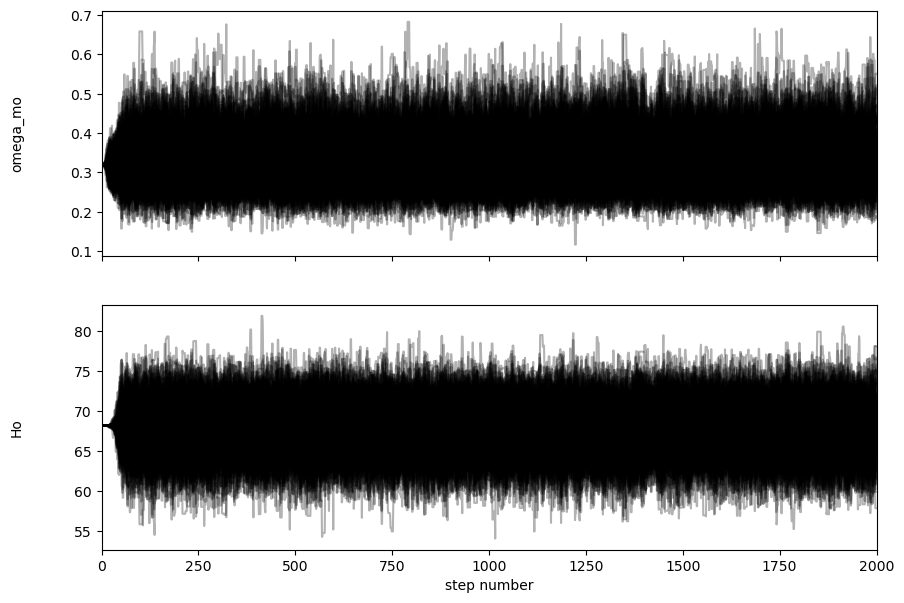

In [11]:
#plot for 2000 steps
fig, axes = plt.subplots(2,figsize =(10,7),sharex=True)
samples = sampler.get_chain()
labels = ["omega_mo","Ho"]
for i in range(ndim):
    ax = axes[i]
    ax.plot(samples[:,:,i],"k",alpha= 0.3)
    ax.set_xlim(0,len(samples))
    ax.set_ylabel(labels[i])
    ax.yaxis.set_label_coords(-0.1,0.5)
    axes[-1].set_xlabel("step number");
    

In [12]:
sampler.reset()

In [13]:
sampler.run_mcmc(pos,20000,progress=True)

100%|██████████| 20000/20000 [05:26<00:00, 61.31it/s]


State([[ 0.31331488 68.88008481]
 [ 0.49088417 59.26567913]
 [ 0.37226905 66.5653009 ]
 [ 0.42214876 63.12773523]
 [ 0.27410473 68.83069755]
 [ 0.31862359 67.59312224]
 [ 0.3512051  68.37438319]
 [ 0.35006938 65.50134193]
 [ 0.35106383 67.07421253]
 [ 0.23626161 74.64183292]
 [ 0.30154277 67.64335801]
 [ 0.37940172 66.47379163]
 [ 0.23627533 70.93977285]
 [ 0.32003407 67.32029809]
 [ 0.36260312 69.42080981]
 [ 0.22767467 73.31142836]
 [ 0.34122332 66.0197976 ]
 [ 0.44183508 63.63147144]
 [ 0.35820285 66.37048443]
 [ 0.35760001 68.10339344]
 [ 0.34100603 64.18708842]
 [ 0.30372593 69.93946533]
 [ 0.33226645 63.88309875]
 [ 0.29786768 69.46123535]
 [ 0.24289849 74.09129036]
 [ 0.23433058 71.48620088]
 [ 0.34511454 67.49406596]
 [ 0.38786914 66.34566115]
 [ 0.4040554  65.79341558]
 [ 0.38127044 63.92089852]
 [ 0.27564471 69.09937358]
 [ 0.4336371  64.85728052]
 [ 0.34595045 69.24224116]
 [ 0.24038887 72.04114467]
 [ 0.3020686  69.63163615]
 [ 0.30182501 68.19415681]
 [ 0.29079654 67.59984

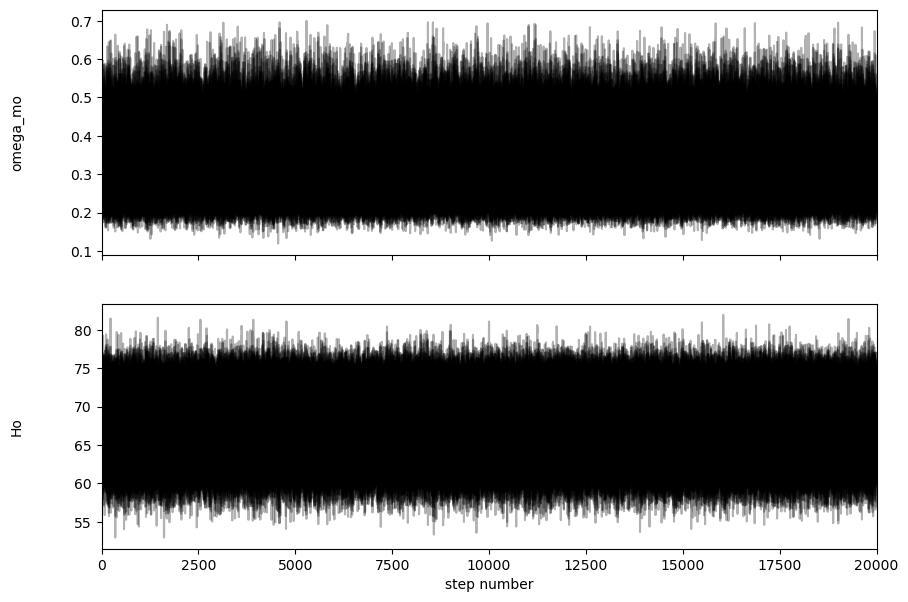

In [14]:
#plot for 20000 steps
fig, axes = plt.subplots(2,figsize =(10,7),sharex=True)
samples = sampler.get_chain()
labels = ["omega_mo","Ho"]
for i in range(ndim):
    ax = axes[i]
    ax.plot(samples[:,:,i],"k",alpha= 0.3)
    ax.set_xlim(0,len(samples))
    ax.set_ylabel(labels[i])
    ax.yaxis.set_label_coords(-0.1,0.5)
    axes[-1].set_xlabel("step number");


In [15]:
tau = sampler.get_autocorr_time()
print(tau)

[31.78246491 31.3610355 ]


In [16]:
samples.shape

(20000, 200, 2)

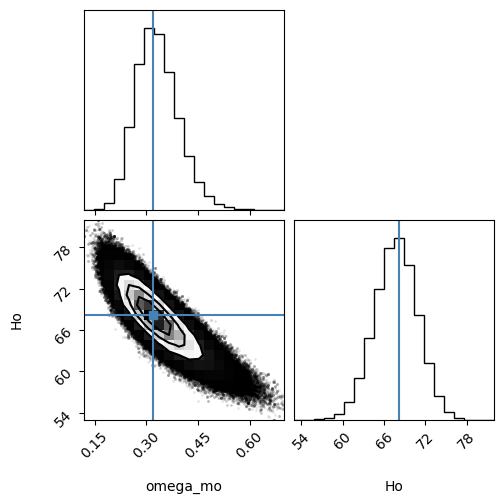

In [18]:
#contour plot for 20000 steps
import corner
flat_samples = sampler.get_chain(flat =True)
fig = corner.corner(flat_samples,labels = labels ,truths = soln.x);


In [19]:
from IPython.display import display,Math
for i in range(ndim):
    mcmc = np.percentile(flat_samples[:,i],[15.87, 50, 84.13])
    q= np.diff(mcmc)
    txt = "\mathrm{{{3}}} = {0:.3f}_{{-{1:.3f}}}^{{{2:.3f}}}"
    txt = txt.format(mcmc[1],q[0],q[1],labels[i])
    display(Math(txt))

<IPython.core.display.Math object>

<IPython.core.display.Math object>

In [20]:
%matplotlib inline
%config InlineBackend.figure_format = "retina"
import sys,os
sys.path.insert(0,os.path.realpath(os.path.join(os.getcwd(),'..')))
from getdist import plots,MCSamples
import getdist
import matplotlib.pyplot as plt
import IPython
print('GetDist Version :%s ,Matplotlib version:%s'%(getdist.__version__,plt.matplotlib.__version__))
      

GetDist Version :1.4.6 ,Matplotlib version:3.8.0


In [21]:
names = ["omega_mo","Ho"]
labels = ["omega_mo","Ho"]
samples = MCSamples(samples=flat_samples,names=names,labels=labels)

Removed no burn in


In [22]:
means = samples.getMeans()
stats = samples.getMargeStats()
conf_levels = samples.contours

In [23]:
print(means)
mcmc

[ 0.33241716 67.71871657]


array([64.62776775, 67.75828061, 70.81103216])

In [24]:
lims0 = stats.parWithName('omega_mo').limits
lims1 = stats.parWithName('Ho').limits

In [25]:
for conf,lim0,lim1 in zip(samples.contours,lims0,lims1):
    #print(lim.lower,mcmc1[1])
    if conf != 0.6827:
        continue
    print('value: %.3f,lower: %.3f,upper: %.3f'%(means[0],lim0.lower-means[0],lim.upper-means[0]))
    print('value: %.3f,lower: %.3f,upper: %.3f'%(means[1],lim0.lower-means[1],lim.upper-means[1]))
    

<Figure size 600x450 with 0 Axes>

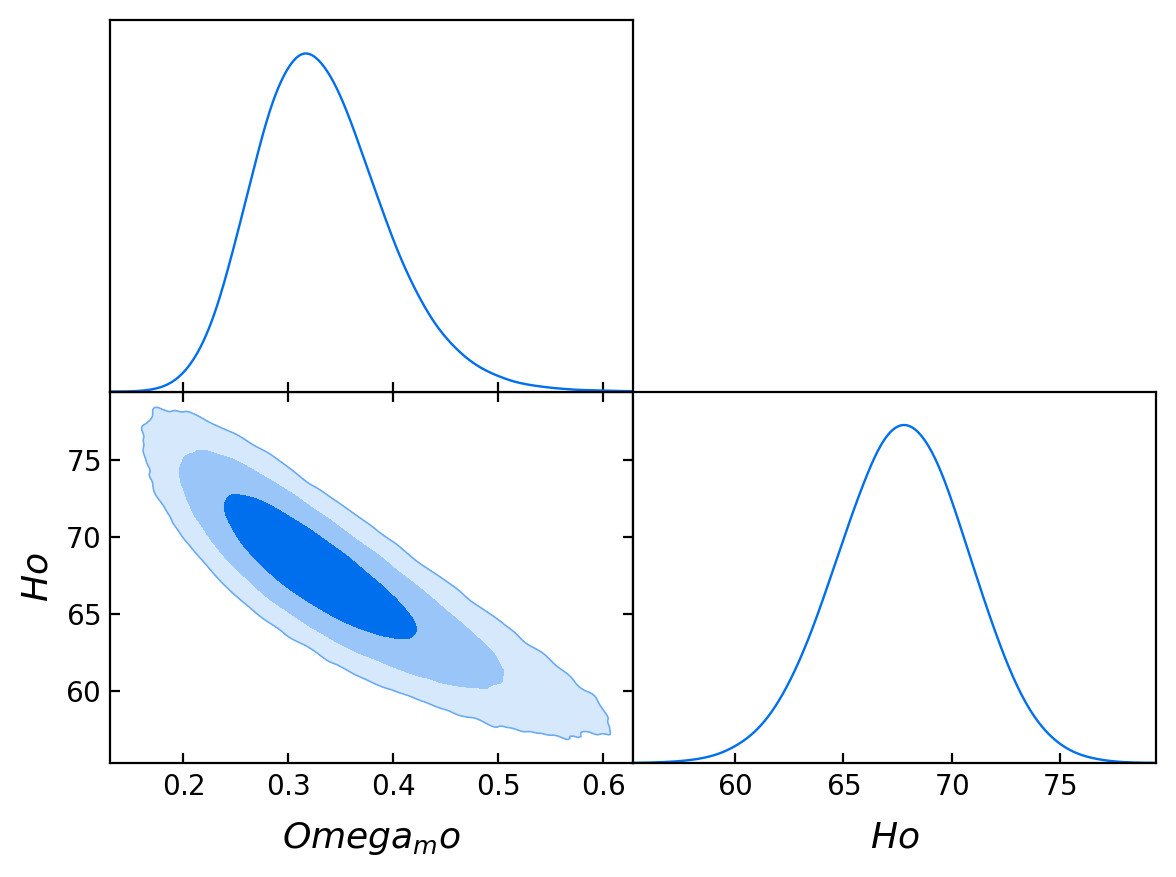

In [26]:
g = plots.get_single_plotter()
samples.updateSettings({'contours':[0.6827,0.9545,0.9973]})
g.settings.num_plot_contours = 4
g.triangle_plot([samples],filled= True);